# 1.1 例子：多项式拟合

假设我们有两个实值变量 $x, t$，满足关系：

$$t = sin(2\pi x) + \epsilon$$

其中 $\epsilon$ 是一个服从高斯分布的随机值。

假设我们有 `N` 组 $(x, t)$ 的观测值 $\mathsf x \equiv (x_1, \dots, x_N)^\text{T}, \mathsf t \equiv (t_1, \dots, t_N)^\text{T}$：

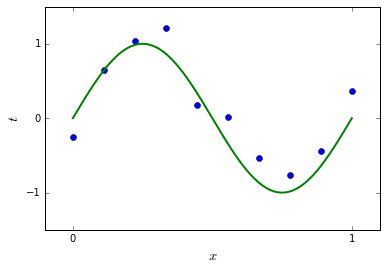

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

# 设置 n

N = 10

# 生成 0，1 之间等距的 N 个 数
x_tr = np.linspace(0, 1, N)

# 计算 t
t_tr = np.sin(2 * np.pi * x_tr) + 0.2 * np.random.randn(N)

# 绘图

xx = np.linspace(0, 1, 500)

fig, ax = plt.subplots()
ax.plot(x_tr, t_tr, 'co')
ax.plot(xx, np.sin(2 * np.pi * xx), 'g', linewidth=2)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks([0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_xlabel("$x$", fontsize="x-large")
ax.set_ylabel("$t$", fontsize="x-large")

plt.show()

使用这 `N` 个数据点作为训练集，我们希望得到这个一个模型：给定一个新的输入 $\hat x$，预测他对应的输出 $\hat t$。

我们使用曲线拟合的方法来解决这个问题。

具体来说，我们来拟合这样一个多项式函数：
$$
y(x,\mathbf w)=w_0+w_1 x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^M w_j x^j
$$

其中 $M$ 是多项式的阶数，$x^j$ 表示 $x$ 的 $j$ 次方，$\mathbf w \equiv (w_0, w_1, \dots, w_M)$ 表示多项式的系数。

这些多项式的系数可以通过我们的数据拟合得到，即在训练集上最小化一个关于 $y(x,\mathbf w)$ 和 $t$ 的损失函数。常见的一个损失函数是平方误差和，定义为：
$$
E(\mathbf w)=\frac{1}{2} \sum_{i=1}^N \left\{y(x, \mathbf w) - t_n\right\}^2
$$

因子 $\frac{1}{2}$ 是为了之后的计算方便加上的。

这个损失函数是非负的，当且仅当函数 $y(x, \mathbf w)$ 通过所有的数据点时才会为零。

对于这个损失函数，因为它是一个关于 $\mathbf w$ 的二次函数，其关于 $\mathbf w$ 的梯度是一个关于 $\mathbf w$ 的线性函数，因此我们可以找到一个唯一解 $\mathbf w^\star$。

$$
\frac{\partial E(\mathbf w)}{w_j} = \sum_{n=1}^N \left(\sum_{j=0}^M w_j x_n^j - t_n\right) x_n^j  = 0
$$

另一个需要考虑的拟合参数是多项式的阶数 $M$，我们可以看看当 $M = 0,1,3,9$ 时的效果（红线）。

可以看到，$M=3$ 似乎是其中较好的一个选择，$M=9$ 虽然拟合的效果最好（通过了所有的训练数据点），但很明显过拟合了。

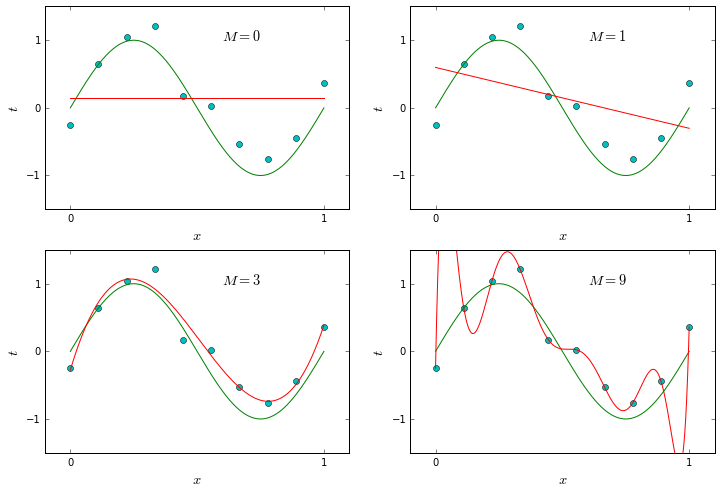

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()
Ms = [0, 1, 3, 9]

for ax, M in zip(axes, Ms):
    # 计算参数
    coeff = np.polyfit(x_tr, t_tr, M)
    
    # 生成函数 y(x, w)
    f = np.poly1d(coeff)
    
    # 绘图
    xx = np.linspace(0, 1, 500)
    ax.plot(x_tr, t_tr, 'co')
    ax.plot(xx, np.sin(2 * np.pi * xx), 'g')
    ax.plot(xx, f(xx), 'r')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xlabel("$x$",fontsize="x-large")
    ax.set_ylabel("$t$",fontsize="x-large")
    ax.text(0.6, 1, '$M={}$'.format(M), fontsize="x-large")

plt.show()

通常我们为了检测模型的效果，会找到一组与训练集相同分布的数据进行测试，然后计算不同模型选择下，训练集和测试集上的 $E(\mathbf w^\star)$ 值。

注意到随着测试点数目的变化，$E(\mathbf w^\star)$ 的尺度也在不断变化，因此一个更好的选择是使用 `root-mean-square (RMS)` 误差：
$$
E_{RMS}=\sqrt{2E(\mathbf w^star) / N}
$$

`RMS` 误差的衡量尺度和单位与目标值 $t$ 一致。

我们用相同的方法产生100组数据作为测试集，计算不同 $M$ 下的 `RMS` 误差：|

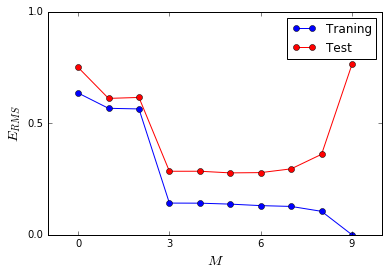

In [9]:
x_te = np.random.rand(100)
t_te = np.sin(2 * np.pi * x_te) + 0.2 * np.random.randn(100)
rms_tr, rms_te = [], []

for M in xrange(10):
    # 计算参数
    coeff = np.polyfit(x_tr, t_tr, M)
    # 生成函数 y(x, w)
    f = np.poly1d(coeff)
    
    # RMS
    rms_tr.append(np.sqrt(((f(x_tr) - t_tr) ** 2).sum() / x_tr.shape[0]))
    rms_te.append(np.sqrt(((f(x_te) - t_te) ** 2).sum() / x_te.shape[0]))

# 画图
fig, ax = plt.subplots()

ax.plot(range(10), rms_tr, 'bo-', range(10), rms_te, 'ro-')
ax.set_xlim(-1, 10)
ax.set_ylim(0, 1)
ax.set_xticks(xrange(0, 10, 3))
ax.set_yticks([0, 0.5, 1])
ax.set_xlabel("$M$",fontsize="x-large")
ax.set_ylabel("$E_{RMS}$",fontsize="x-large")
ax.legend(['Traning', 'Test'], loc="best")

plt.show()

可以看到 $M = 9$ 时，虽然训练集上的误差已经降到 `0`，但是测试集上的误差却很大。

我们来看看 $M = 9$ 时的多项式系数，为了更好的拟合这些点，系数都会变得很大：

In [8]:
for i, w in enumerate(np.polyfit(x_tr, t_tr, 9)):
    print "w_{}, {:.2f}".format(9 - i, w)

w_9, 78264.80
w_8, -358639.19
w_7, 691006.17
w_6, -726691.57
w_5, 452612.55
w_4, -169178.98
w_3, 36559.49
w_2, -4121.48
w_1, 188.81
w_0, -0.25


另一个有趣的现象是查看当训练数据量 $N$ 变多时，$M = 9$ 的模型的表现：

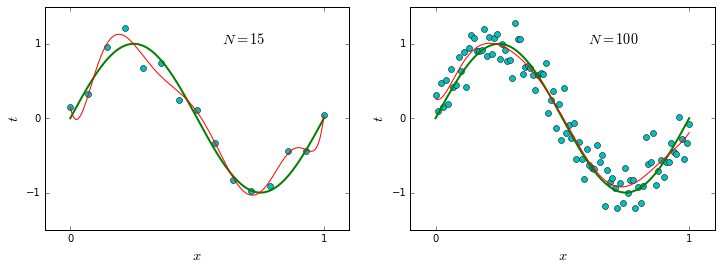

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes = axes.flatten()

for ax, N in zip(axes, (15, 100)):
    # 生成 0，1 之间等距的 N 个 数
    x_tr_more = np.linspace(0, 1, N)

    # 计算 t
    t_tr_more = np.sin(2 * np.pi * x_tr_more) + 0.2 * np.random.randn(N)
    # 计算参数
    coeff = np.polyfit(x_tr_more, t_tr_more, M)
    # 生成函数 y(x, w)
    f = np.poly1d(coeff)
    
    # 绘图
    xx = np.linspace(0, 1, 500)
    ax.plot(x_tr_more, t_tr_more, 'co')
    ax.plot(xx, np.sin(2 * np.pi * xx), 'g', linewidth=2)
    ax.plot(xx, f(xx), 'r')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xlabel("$x$", fontsize="x-large")
    ax.set_ylabel("$t$", fontsize="x-large")
    ax.text(0.6, 1, '$N={}$'.format(N), fontsize="x-large")

plt.show()

可以看到，随着 $N$ 的增大，模型拟合的过拟合现象在减少。

当模型的复杂度固定时，随着数据的增加，过拟合的现象也在逐渐减少。

回到之前的问题，如果我们一定要在 $N=10$ 的数据上使用 $M=9$ 的模型，那么一个通常的做法是给参数加一个正则项的约束防止过拟合，一个最常用的正则项是平方正则项，即控制所有参数的平方和大小：

$$
\tilde E(\mathbf w) = \frac{1}{2}\sum_{i=1}^N \left\{y(x_n,\mathbf w) - t_n\right\}^2 + \frac{\lambda}{2} \|\mathbf w\|^2
$$

其中 $\|\mathbf w\|^2 \equiv \mathbf{w^{\text{T}}w} = w_0^2 + \dots | w_M^2$，$\lambda$ 是控制正则项和误差项的相对重要性。

通常情况下，如果我们需要决定我们系统的复杂度参数 ($\lambda, M$)，一个常用的方法是从训练数据中拿出一小部分作为验证集，来测试我们的复杂度；不过这样会带来训练减少的问题。